# Data preparation and transformation exercise

## Part VI - Sampling and balancing

The objective of this exercise is to practice various steps of data preprocessing and feature engineering.

The scenario is the preparation of data for a ML multilinear regressions.

The dataset used is the "Climate Weather Surface of Brazil - Hourly", wich is available at <a href="https://www.kaggle.com/PROPPG-PPG/hourly-weather-surface-brazil-southeast-region?select=make_dataset.py">Kaggle</a>.

It contains hourly climate data taken from 122 weather stations in Brasil between 2000 and 2021.

**Steps:**

1. Load data
2. Inspect data
3. Format features
4. Clean messy data
5. Remove duplicate values
6. Treat missing values
7. Imputation
8. Remove strongly correlated features
9. Remove outliers
10. Aggregate features
11. Encode categorical features
12. Feature scaling
13. Dimensionality reduction and feature decomposition

14. <a href="#Sample-and-balance">Sample and balance</a>

In [84]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
dataset = pickle.load(open("scaled_dataset.pkl", "rb"))

## Sample and balance

The dataset is not balanced because very few stations were operational in the first years.

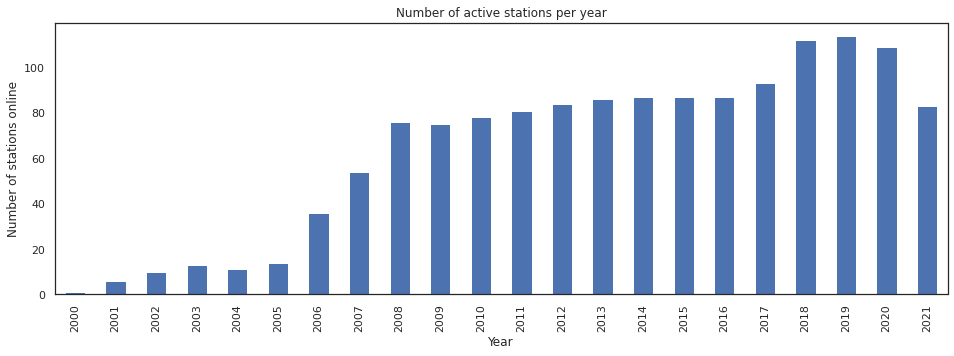

In [89]:
dataset['year'] = dataset.full_time.dt.year
dataset.groupby('year')['station_name'].nunique().plot(kind='bar', figsize=(16,5))
plt.xlabel('Year')
plt.ylabel('Number of stations online')
plt.title('Number of active stations per year');

Due to outlier removal (an stations coming online/offline), not all stations have the same number of samples in the last year, but this won't matter if we do regression per station.

Another inbalance in the dataset, also due to outlier removal, is that each hour of the day does not necessarily have the same number of measurements.

In [90]:
dataset['hour'] = dataset.full_time.dt.hour

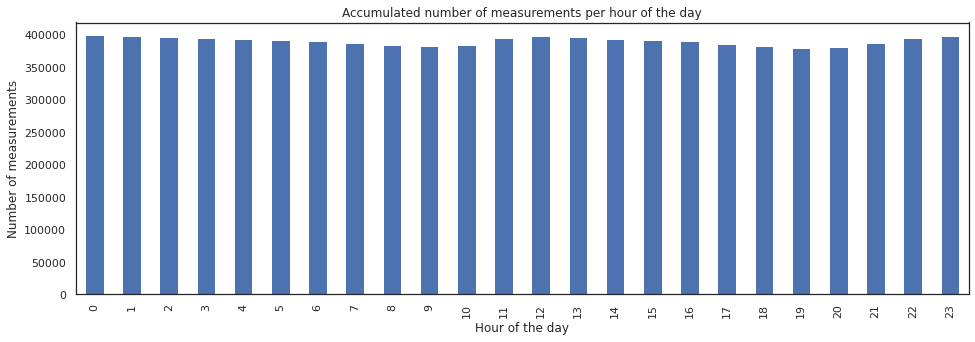

In [91]:
dataset.groupby('hour')['station_name'].count().plot(kind='bar', figsize=(16,5))
plt.xlabel('Hour of the day')
plt.ylabel('Number of measurements')
plt.title('Accumulated number of measurements per hour of the day');

Let's create a sub-dataset with only the 'SERRA NOVA DOURADA' station, and readings from the year 2020, and then balance these readings per hour.

In [92]:
dataset['month'] = dataset.full_time.dt.month

In [93]:
station_2020 = dataset.loc[(dataset.station_name == 'SERRA NOVA DOURADA') & (dataset.year == 2020)]

Text(0, 0.5, 'Number of measurements')

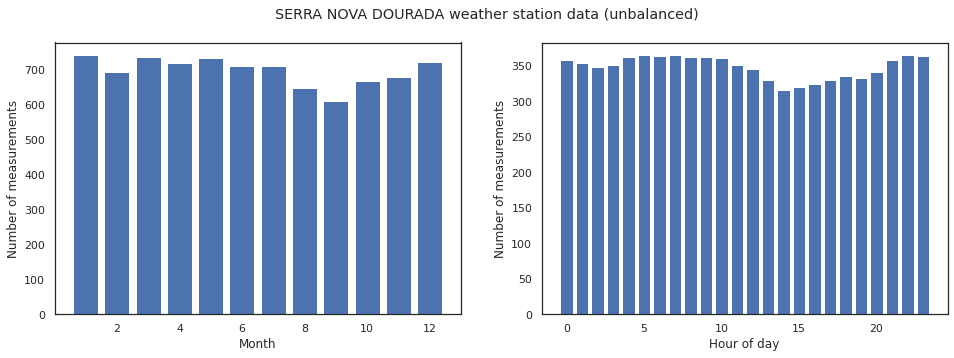

In [94]:
df1 = station_2020.groupby('month')['station_name'].count()
df2 = station_2020.groupby('hour')['station_name'].count()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
fig.suptitle('SERRA NOVA DOURADA weather station data (unbalanced)')

ax1.bar(df1.index, df1)
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of measurements')

ax2.bar(df2.index, df2)
ax2.set_xlabel('Hour of day')
ax2.set_ylabel('Number of measurements')

Let's balance the number of measurements throughout the hours of the day.

First we need to determine the minimum number of samples in any given hour of the day.

In [95]:
minimum_measurements = station_2020.groupby('hour')['station_name'].count().min()
minimum_measurements

315

In [96]:
# For every hour we will get the same number of samples (minimum_measurements)

frames = []

# for each hourhour
for i in range(0,24):

    # create a dataset with all measurements taken at that hour
    df_hour =  station_2020[station_2020.hour == i]
    
    print('At {} hour(s) there are {} measurements to sample from'.format(i, len(df_hour)))
    
    # create a frame with 219 samples from that dataframe
    df_hour_balanced = df_hour.sample(n=minimum_measurements, random_state=1)

    # append to array with previous frames
    frames.append(df_hour_balanced)

At 0 hour(s) there are 357 measurements to sample from
At 1 hour(s) there are 354 measurements to sample from
At 2 hour(s) there are 348 measurements to sample from
At 3 hour(s) there are 351 measurements to sample from
At 4 hour(s) there are 362 measurements to sample from
At 5 hour(s) there are 364 measurements to sample from
At 6 hour(s) there are 363 measurements to sample from
At 7 hour(s) there are 364 measurements to sample from
At 8 hour(s) there are 362 measurements to sample from
At 9 hour(s) there are 362 measurements to sample from
At 10 hour(s) there are 360 measurements to sample from
At 11 hour(s) there are 351 measurements to sample from
At 12 hour(s) there are 345 measurements to sample from
At 13 hour(s) there are 330 measurements to sample from
At 14 hour(s) there are 315 measurements to sample from
At 15 hour(s) there are 319 measurements to sample from
At 16 hour(s) there are 324 measurements to sample from
At 17 hour(s) there are 330 measurements to sample from
At

In [97]:
# create a balanced dataset from the frames
balanced_station_2020 = pd.concat(frames)

In [98]:
print('Started with {} measurements and generated a balnced dataset of {} measurements'.format(
    len(station_2020),
    len(balanced_station_2020)))

Started with 8353 measurements and generated a balnced dataset of 7560 measurements


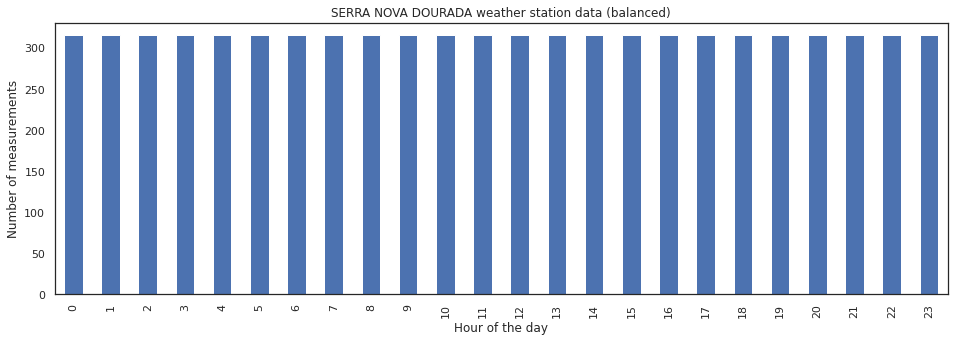

In [99]:
balanced_station_2020.groupby('hour')['station_name'].count().plot(kind='bar', figsize=(16,5))
plt.xlabel('Hour of the day')
plt.ylabel('Number of measurements')
plt.title('SERRA NOVA DOURADA weather station data (balanced)');

Thanks for your interest. Feedback is appreciated.